<a href="https://colab.research.google.com/github/Shweta-sharma-1998/Final-Project-On-Machine-Learning/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [144]:
df= pd.read_csv("/content/train-chennai-sale.csv")

In [145]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [146]:
df.shape

(7109, 22)

In [147]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [148]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [149]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [150]:
df = df.drop(columns=["PRT_ID"])

**AREA**

In [151]:
df['AREA'].value_counts()  

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [152]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [153]:
df["AREA"]= df["AREA"].replace(to_replace="chrompet", value="chromepet")

In [154]:
df["AREA"]= df["AREA"].replace(to_replace=["chrompt"], value="chromepet")

In [155]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrompet","chromepet"))

In [156]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrompt","chromepet"))

In [157]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chrmpet","chromepet"))

In [158]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Chormpet","chromepet"))

In [159]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Ana Nagar","Anna Nagar"))

In [160]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Ann Nagar","Anna Nagar"))

In [161]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Adyr","Adyar"))

In [162]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("KKNagar","KK Nagar"))

In [163]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("KKNagar","KK Nagar"))

In [164]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Velchery","Velacheri"))

In [165]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Velachery","Velacheri"))

In [166]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("TNagar","T Nagar"))

In [167]:
df["AREA"]= df["AREA"].apply(lambda x: x.replace("Karapakam","Karapakkam"))

In [168]:
df['AREA'].value_counts()

chromepet     1702
Karapakkam    1366
KK Nagar       997
Velacheri      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**INT_SQFT**

In [169]:
df["INT_SQFT"].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [170]:
df["INT_SQFT"].isnull().sum()

0

In [171]:
df["INT_SQFT"].values[0]

1004

**DATE_SALE**

In [172]:
df["DATE_SALE"].values[0]

'04-05-2011'

In [173]:
import datetime
datestring= "04-05-2011"
date= datetime.datetime.strptime(datestring,"%d-%m-%Y")
date

datetime.datetime(2011, 5, 4, 0, 0)

In [174]:
df["DATE_SALE"]= pd.to_datetime(df["DATE_SALE"], format= "%d-%m-%Y")

In [175]:
df["DATE_SALE"].values[0]

numpy.datetime64('2011-05-04T00:00:00.000000000')

In [176]:
df["DATE_BUILD"]= pd.to_datetime(df["DATE_BUILD"], format= "%d-%m-%Y")

In [177]:
df['HOUSE_LIFETIME'] = df['DATE_SALE'] .subtract( df['DATE_BUILD'])

In [178]:
df['HOUSE_LIFETIME']= df['HOUSE_LIFETIME'].dt.days

In [179]:
df['HOUSE_LIFETIME'].values[0]

16060

In [180]:
df['DATE_SALE'].isnull().sum()

0

In [181]:
df["DATE_BUILD"].isnull().sum()

0

**DIST_MAINROAD**

In [182]:
df['DIST_MAINROAD'].values[0]

131

In [183]:
df['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [184]:
df['DIST_MAINROAD'].isnull().sum()

0

**N_BEDROOM**

In [185]:
df['N_BEDROOM'].values[0]

1.0

In [186]:
df['N_BEDROOM'].isnull().sum()

1

In [187]:
df= df.dropna(subset=['N_BEDROOM'])

In [188]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [189]:
df["N_BEDROOM"]= df["N_BEDROOM"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
df['N_BEDROOM'].describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

**N_BATHROOM**

In [191]:
df["N_BATHROOM"].values[0]

1.0

In [192]:
df['N_BATHROOM'].describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [193]:
df['N_BATHROOM'].isnull().sum()

5

In [194]:
df= df.dropna(subset=['N_BATHROOM'])

In [195]:
df["N_BATHROOM"]= df["N_BATHROOM"].astype("int64")

**N_ROOM**

In [196]:
df['N_ROOM'].isnull().sum()

0

In [197]:
df['N_ROOM'].values[0]

3

In [198]:
df['N_ROOM'].describe()

count    7103.000000
mean        3.688723
std         1.019299
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

**SALE_COND**

In [199]:
df['SALE_COND'].values[0]

'AbNormal'

In [200]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [201]:
cond= {"Adj Land": "AdjLand", "Ab Normal" :"AbNormal",  "PartiaLl" :"Partial"}
df["SALE_COND"]= df["SALE_COND"].replace(cond)

In [202]:
df["SALE_COND"]= df["SALE_COND"].apply(lambda x: x.replace("Partiall","Partial"))

In [203]:
df["SALE_COND"].value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

In [204]:
df['SALE_COND'].isnull().sum()

0

**PARK_FACIL**

In [205]:
df['PARK_FACIL'].isnull().sum()

0

In [206]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [207]:
df["PARK_FACIL"]= df["PARK_FACIL"].apply(lambda x: x.replace("Noo","No"))

In [208]:
df['PARK_FACIL'].value_counts()

Yes    3584
No     3519
Name: PARK_FACIL, dtype: int64

**BUILD_TYPE**

In [209]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [210]:
df["BUILDTYPE"] =df["BUILDTYPE"].apply(lambda x: x.replace("Comercial", "Commercial"))
df["BUILDTYPE"]=df["BUILDTYPE"].apply(lambda x: x.replace("Other", "Others"))
df["BUILDTYPE"]=df["BUILDTYPE"].apply(lambda x: x.replace("Otherss", "Others"))

In [211]:
df["BUILDTYPE"].value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [212]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [213]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].apply(lambda x: x.replace("AllPub", "All Pub"))

In [214]:
df["UTILITY_AVAIL"]= df["UTILITY_AVAIL"].apply(lambda x: x.replace("NoSewr ", "NoSewr"))

In [215]:
df["UTILITY_AVAIL"].value_counts()

All Pub    1886
NoSeWa     1870
NoSewr     1826
ELO        1521
Name: UTILITY_AVAIL, dtype: int64

In [216]:
df["UTILITY_AVAIL"].isnull().sum()

0

**STREET**

In [217]:
df['STREET'].isnull().sum()

0

In [218]:
df['STREET'].values[0]

'Paved'

In [219]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [220]:
df["STREET"]= df["STREET"].apply(lambda x: x.replace("NoAccess", "No Access"))
df["STREET"]= df["STREET"].apply(lambda x: x.replace("Pavd", "Paved"))

In [221]:
df["STREET"].value_counts() 

Paved        2570
Gravel       2518
No Access    2015
Name: STREET, dtype: int64

**MZZONE**

In [222]:
df['MZZONE'].isnull().sum()

0

In [223]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**QS_OVERALL**

In [224]:
df['QS_OVERALL'].isnull().sum()

47

In [225]:
df['QS_OVERALL'].values[0]

4.33

In [226]:
df['QS_OVERALL']= df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [227]:
df['QS_OVERALL'].describe()

count    7103.000000
mean        3.503389
std         0.525565
min         2.000000
25%         3.130000
50%         3.503389
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

**TARFET - SALES_PRICE**

In [228]:
df['SALES_PRICE'].isnull().sum()

0

In [229]:
df['SALES_PRICE'].describe()

count    7.103000e+03
mean     1.089477e+07
std      3.769549e+06
min      2.156875e+06
25%      8.270900e+06
50%      1.033464e+07
75%      1.299422e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**EXPLORATORY DATA ANALYSIS**

**FEATURES VS TARGET **

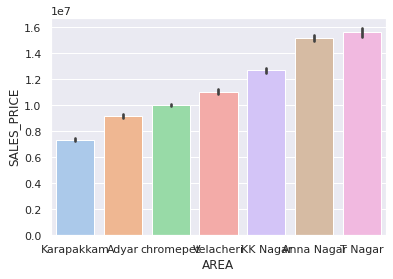

In [230]:
sns.barplot(x=df["AREA"] , y= df["SALES_PRICE"], order= df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

linear Relationship between area and sales price---- lable encoding

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612026
SALES_PRICE,0.612026,1.000000


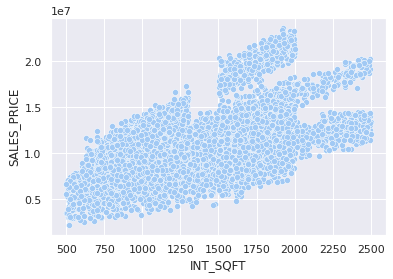

In [231]:
sns.scatterplot(x=df["INT_SQFT"],y=df["SALES_PRICE"])
df[["INT_SQFT","SALES_PRICE"]].corr()

Linear Relationship between int_sqft and sales price

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018679
SALES_PRICE,0.018679,1.000000


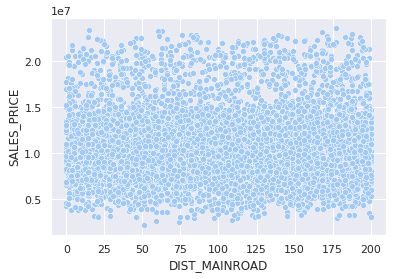

In [232]:
sns.scatterplot(x= df["DIST_MAINROAD"],y= df["SALES_PRICE"])
df[["DIST_MAINROAD","SALES_PRICE"]].corr()

NO relationship and No linear relationship between main road distance and sales price, So better to drop it

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330933
SALES_PRICE,0.330933,1.000000


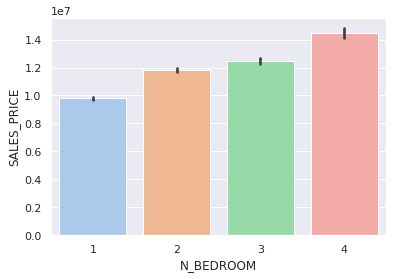

In [233]:
sns.barplot(x=df["N_BEDROOM"] , y= df["SALES_PRICE"],order= df.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])
df[["N_BEDROOM", "SALES_PRICE"]].corr()

 linear realtionship between bedroom and sales price

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108884
SALES_PRICE,0.108884,1.000000


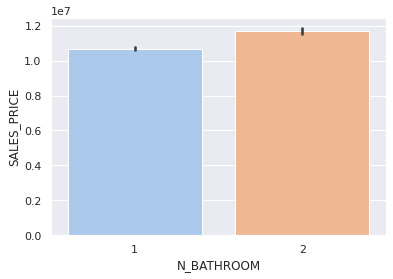

In [234]:
sns.barplot(x= df["N_BATHROOM"], y= df["SALES_PRICE"])
df[["N_BATHROOM","SALES_PRICE"]].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.000000,0.602637
SALES_PRICE,0.602637,1.000000


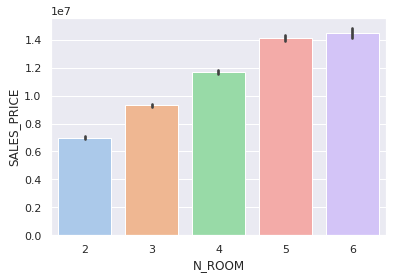

In [235]:
sns.barplot(x=df["N_ROOM"], y= df["SALES_PRICE"])
df[["N_ROOM", "SALES_PRICE"]].corr()

Better realtionship between sales price and rooms and obviouslt linearity in between

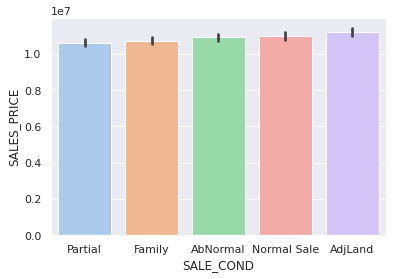

In [236]:
sns.barplot(x= df["SALE_COND"], y=df["SALES_PRICE"],order= df.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])


linear relationship between sale condition and sales price---- label encoding

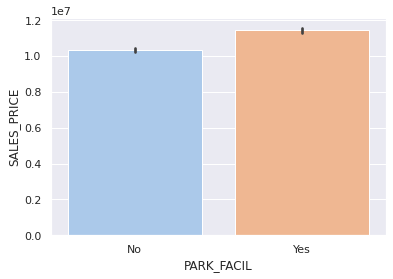

In [237]:
sns.barplot(x= df["PARK_FACIL"], y=df["SALES_PRICE"],order= df.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])


Linear relationship exist between parking facility and sales price ---- label encoding

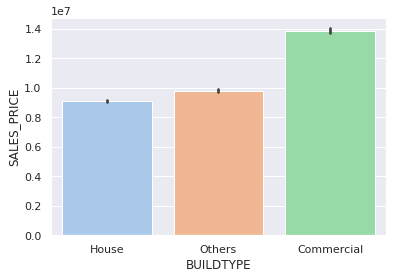

In [238]:
sns.barplot(x= df["BUILDTYPE"], y= df["SALES_PRICE"],order= df.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])

No linear relationship between buildtype and sales price---- one hot encoding

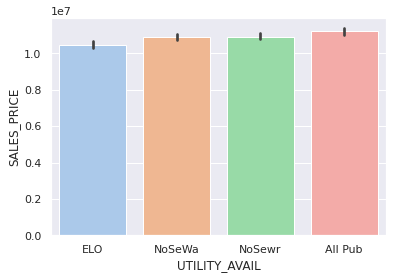

In [239]:
sns.barplot(x= df["UTILITY_AVAIL"], y= df["SALES_PRICE"],order= df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

linear relationship between Utility avail and sales price----- Label encoding

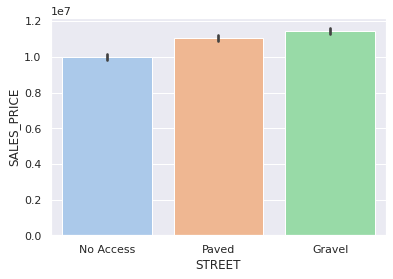

In [240]:
sns.barplot(x= df["STREET"], y= df["SALES_PRICE"],order= df.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])

linear Relationship between Street and sales price------ label encoding

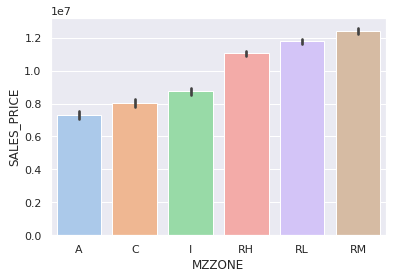

In [241]:
sns.barplot(x= df["MZZONE"], y= df["SALES_PRICE"],order= df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])

linear relationship between Mzzone and sales price-------- label encoding

,HOUSE_LIFETIME,SALES_PRICE
HOUSE_LIFETIME,1.000000,-0.118839
SALES_PRICE,-0.118839,1.000000


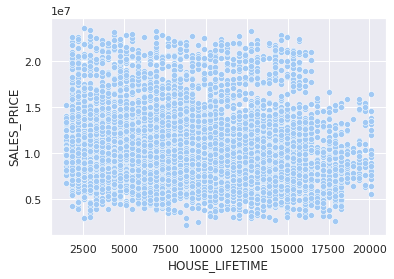

In [242]:
sns.scatterplot(x= df['HOUSE_LIFETIME'], y= df["SALES_PRICE"])
df[['HOUSE_LIFETIME',"SALES_PRICE"]].corr()

slightly linear relationship between house age and sales price

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.00000,0.02196
SALES_PRICE,0.02196,1.00000


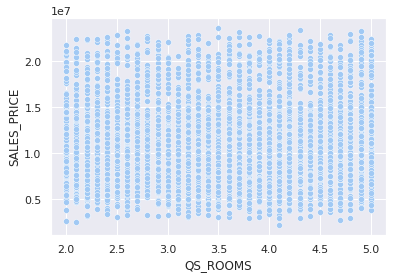

In [243]:
sns.scatterplot(x= df["QS_ROOMS"],y= df["SALES_PRICE"])    # no linear relationship 
df[['QS_ROOMS',"SALES_PRICE"]].corr()


,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011361
SALES_PRICE,-0.011361,1.000000


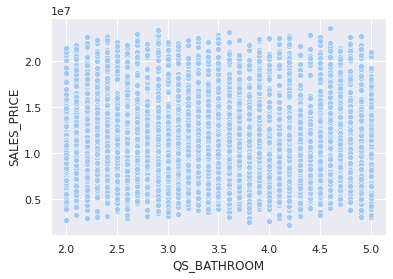

In [244]:
sns.scatterplot(x= df["QS_BATHROOM"],y= df["SALES_PRICE"])     #NO linear relationship
df[['QS_BATHROOM',"SALES_PRICE"]].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.00000,0.01843
SALES_PRICE,0.01843,1.00000


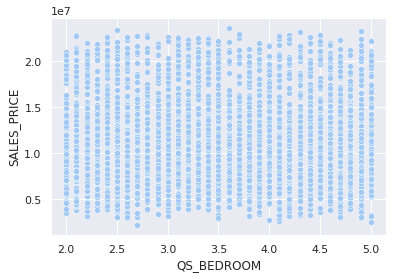

In [245]:
sns.scatterplot(x= df["QS_BEDROOM"],y= df["SALES_PRICE"])    # no linear relationship
df[['QS_BEDROOM',"SALES_PRICE"]].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020282
SALES_PRICE,0.020282,1.000000


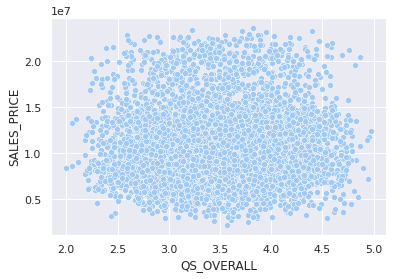

In [246]:
sns.scatterplot(x= df["QS_OVERALL"],y= df["SALES_PRICE"])   # no linear relationship
df[['QS_OVERALL',"SALES_PRICE"]].corr() 

there is no realtionship between QS bedroom, QS bathroom, QS room, QS overall, mainroad distance columns so drop them

In [247]:
df= df.drop(columns=["REG_FEE", "COMMIS", "DATE_SALE", "DATE_BUILD", 'QS_BEDROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_OVERALL', 'DIST_MAINROAD'], axis=1)

In [248]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'HOUSE_LIFETIME'],
      dtype='object')

In [249]:
df.shape

(7103, 13)

In [250]:
df.corr()["SALES_PRICE"].sort_values(ascending= False)

SALES_PRICE       1.000000
INT_SQFT          0.612026
N_ROOM            0.602637
N_BEDROOM         0.330933
N_BATHROOM        0.108884
HOUSE_LIFETIME   -0.118839
Name: SALES_PRICE, dtype: float64

###DISTRIBUTION PLOT

In [251]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

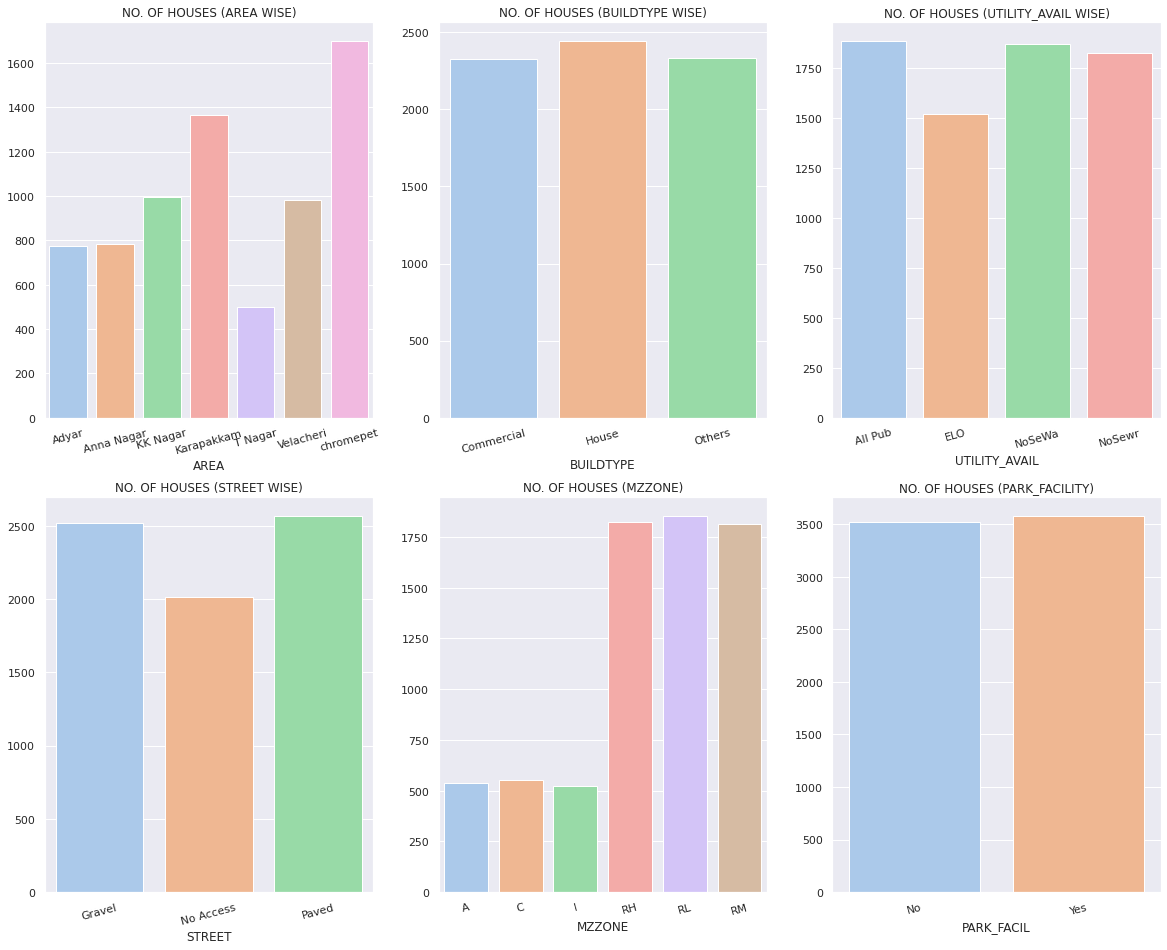

In [252]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


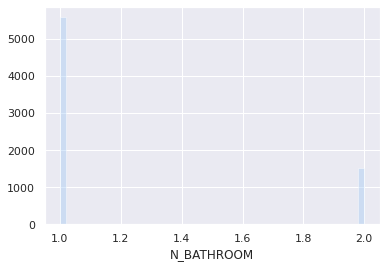

In [253]:
sns.distplot(df['N_BATHROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


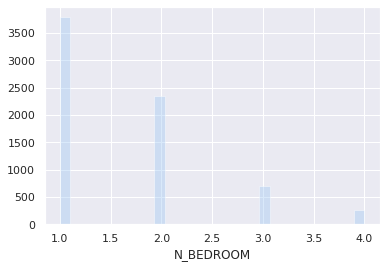

In [254]:
sns.distplot(df['N_BEDROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


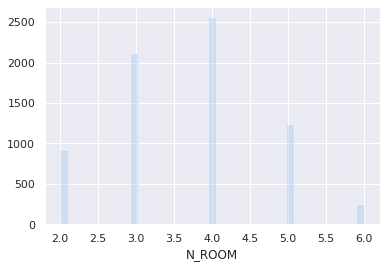

In [255]:
sns.distplot(df['N_ROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


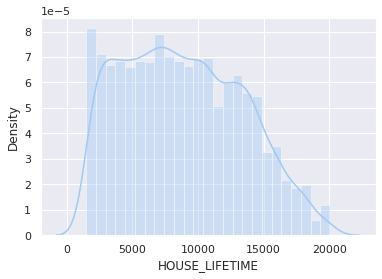

In [256]:
sns.distplot(df['HOUSE_LIFETIME'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


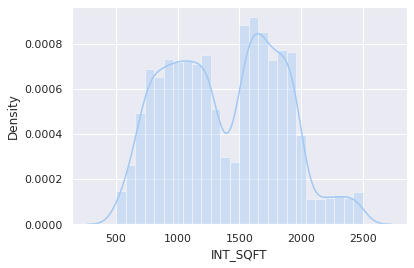

In [257]:
sns.distplot(df['INT_SQFT'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


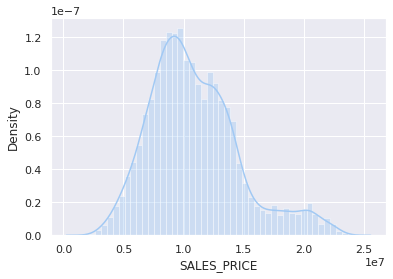

In [258]:
import seaborn as sns
sns.distplot(df['SALES_PRICE'])

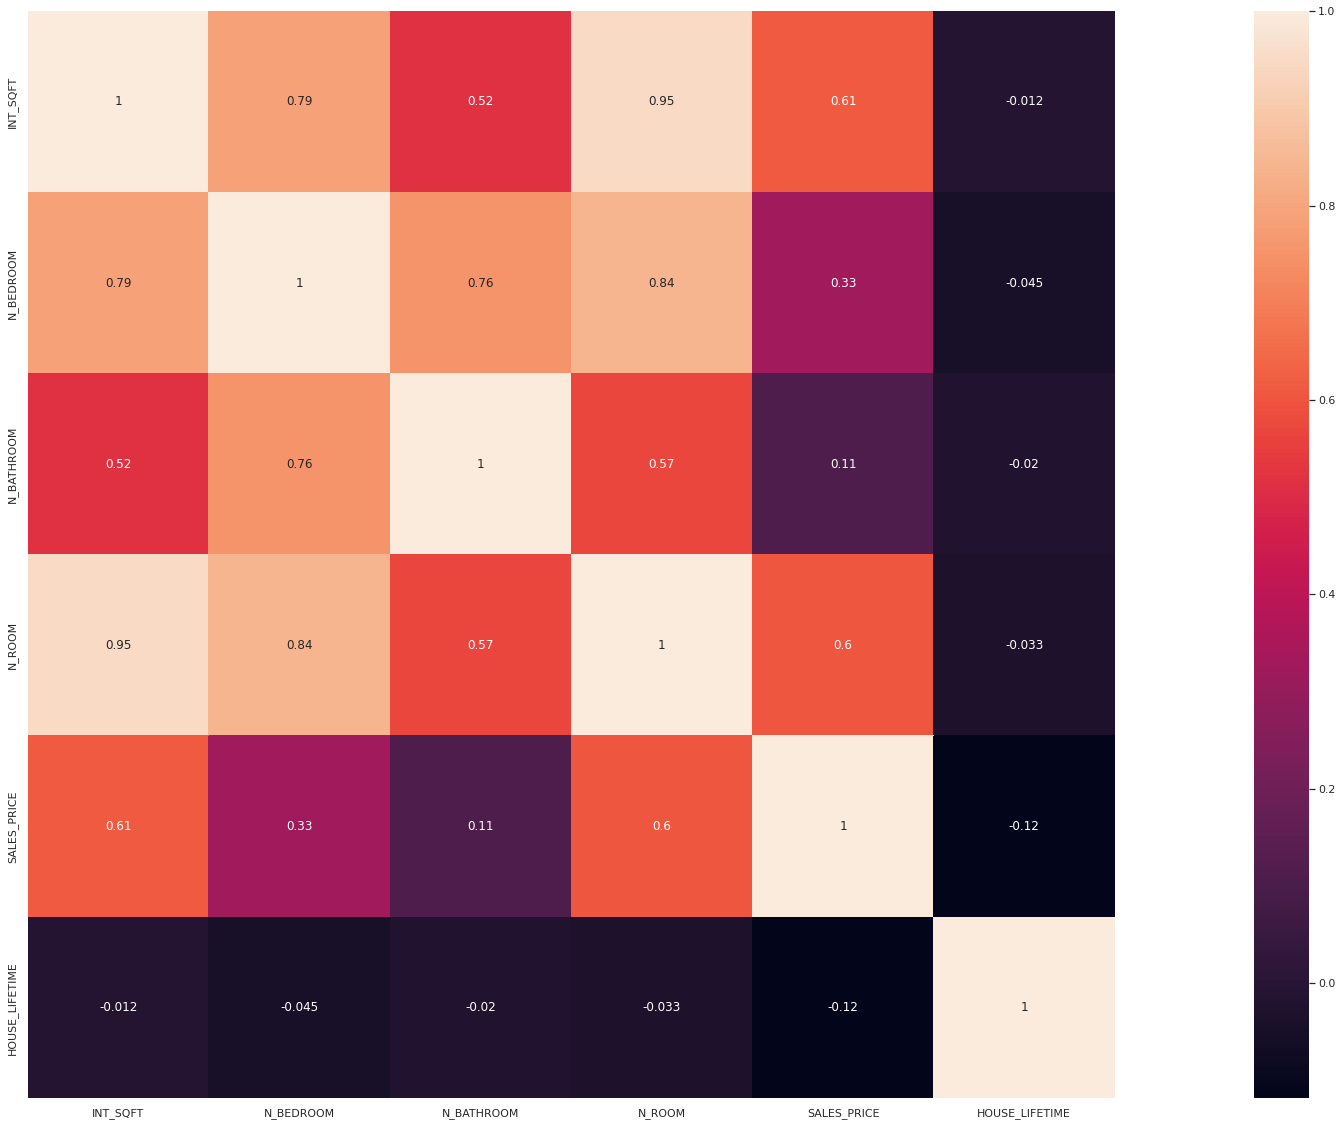

In [259]:
f, ax = plt.subplots(figsize=(50,20))
sns.heatmap(df.corr(),annot= True , square= True);

In [260]:
df.dtypes

AREA              object
INT_SQFT           int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
SALES_PRICE        int64
HOUSE_LIFETIME     int64
dtype: object

In [261]:
df.isnull().sum()

AREA              0
INT_SQFT          0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
SALES_PRICE       0
HOUSE_LIFETIME    0
dtype: int64

###ENCODING

In [262]:
df["AREA"]= df["AREA"].map({'Karapakkam':1,'Adyar': 2,'chromepet' :3,'Velacheri' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})
df["SALE_COND"]= df["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})
df["UTILITY_AVAIL"]= df["UTILITY_AVAIL"].map({'ELO':1,'NoSeWa':3,'NoSewr':4,'All Pub':6})
df["STREET"]= df["STREET"]. map({'No Access':1,'Paved':3,'Gravel':4})
df["PARK_FACIL"]= df["PARK_FACIL"].map({'No': 1, 'Yes':2})
df["MZZONE"]= df["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})


In [263]:
dummies1 = pd.get_dummies(df["BUILDTYPE"])


In [264]:
df= pd.concat([df,dummies1], axis="columns")

In [265]:
df= df.drop("BUILDTYPE", axis=1)

In [266]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,HOUSE_LIFETIME,Commercial,House,Others
0,1,1004,1,1,3,3,2,6,3,1,7600000,16060,1,0,0
1,6,1986,2,1,5,3,1,6,4,5,21717770,4015,1,0,0
2,2,909,1,1,3,3,2,1,4,6,13159200,7300,1,0,0
3,4,1855,3,2,5,2,1,4,3,3,9630290,8030,0,0,1
4,1,1226,1,1,3,3,2,6,4,2,7406250,10950,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1,1,7,5353000,17885,0,0,1
7105,4,1897,3,2,5,2,2,3,1,5,10818480,3285,0,0,1
7106,4,1614,2,1,4,4,1,3,4,3,8351410,10220,0,1,0
7107,1,787,1,1,2,1,2,1,3,6,8507000,11680,1,0,0


###LINEAR REGRESSION MODEL

In [267]:
X= df.drop("SALES_PRICE", axis= "columns")
Y= df["SALES_PRICE"]

In [268]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=10)

In [269]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [270]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5682, 14), (1421, 14), (5682,), (1421,))

In [271]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)


0.9203044870484484

In [272]:
Y_pred= lr.predict(X_test)
Y_pred

array([10596326.89427655, 11460582.89427655, 12266982.89427655, ...,
       12747494.89427655,  5180390.89427655, 13591526.89427655])

In [273]:
print(lr.intercept_)

10905830.894276554


FEATURES IMPORTANCE USING COEFFICIENT METHOD

In [274]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) #  bathroom, utility avial, mzzone, int_sqft, sale cond
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
AREA,1.040784e+06
INT_SQFT,7.044751e+05
N_BEDROOM,-1.258685e+06
N_BATHROOM,8.593367e+04
N_ROOM,1.728417e+06
SALE_COND,2.170793e+05
PARK_FACIL,5.129641e+05
UTILITY_AVAIL,3.952137e+04
STREET,3.803562e+05
MZZONE,8.681316e+05


###EVALUATION

In [275]:
from sklearn.metrics import r2_score
accuracy= r2_score(Y_test,lr.predict(X_test))
accuracy

0.9203044870484484

###KNN REGRESSOR MODEL

In [276]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k =4, 0.9480329733888395
  knn.fit(X_train, Y_train)
  # print("k value  :" , i, "score  :", knn.score(X_test, Y_test))
  print("K value  :", i, "val Accuracy :" , np.mean(cross_val_score(knn, X_train, Y_train, cv=10)))

K value  : 1 val Accuracy : 0.9245646585346167
K value  : 2 val Accuracy : 0.9431615816459059
K value  : 3 val Accuracy : 0.9465624218619769
K value  : 4 val Accuracy : 0.9480329733888395
K value  : 5 val Accuracy : 0.947421931940738
K value  : 6 val Accuracy : 0.9469055925805918
K value  : 7 val Accuracy : 0.9459453572438941
K value  : 8 val Accuracy : 0.9447526598065468
K value  : 9 val Accuracy : 0.9437353480451565
K value  : 10 val Accuracy : 0.9429505763002121
K value  : 20 val Accuracy : 0.9324908416766607
K value  : 30 val Accuracy : 0.9230110313937011
K value  : 40 val Accuracy : 0.9148999754825354
K value  : 50 val Accuracy : 0.9091413268292804


###DECISION TREE REGRESSOR

In [277]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, Y_train)
  accuracy= r2_score(Y_test,dt.predict(X_test))
  dt= DecisionTreeRegressor(max_depth= depth)
  val= cross_val_score(dt, X, Y, cv=10)
  print(depth, accuracy, np.mean(val))

1 0.3532550382955032 0.35884747555797664
2 0.668570600566231 0.6820395137409319
3 0.7935469304359921 0.8017288018824633
4 0.877917501198003 0.8821816531519243
5 0.9175355024374305 0.9152127076437429
6 0.9359857875233057 0.9358913472719724
7 0.95165565951167 0.950432094524381
8 0.9608111783051743 0.962044464296393
9 0.967160689437622 0.9689619612579312
10 0.9700073994836474 0.9728083935759967
20 0.9734616402324768 0.9757901553586604
40 0.9736535149824315 0.9761693924687537
60 0.9741314152431517 0.975859851914439


In [278]:
X.shape, X_test.shape, X_train.shape

((7103, 14), (1421, 14), (5682, 14))

FEATURES IMPORTANCE 

In [279]:
dt= DecisionTreeRegressor(max_depth= 20)
dt.fit(X_train, Y_train)  # area, int_sqft, commericial buildtype, mzzone , park_facl
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances
# dt.fit(X_train, Y_train)
# importance= dt.feature_importances_
# list(zip(importance, X.columns))

[('AREA', 0.48),
 ('Commercial', 0.33),
 ('INT_SQFT', 0.11),
 ('MZZONE', 0.04),
 ('PARK_FACIL', 0.02),
 ('STREET', 0.01),
 ('HOUSE_LIFETIME', 0.01),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('UTILITY_AVAIL', 0.0),
 ('House', 0.0),
 ('Others', 0.0)]

In [280]:
dt= DecisionTreeRegressor(max_depth= 10)
dt.fit(X_train, Y_train)
pred= dt.predict(X_test)
accuracy= r2_score(Y_test,pred)
print(accuracy)

0.970371270119823


In [281]:
df2= pd.DataFrame({"Actual": Y_test, "Predicted": pred})
df2

,Actual,Predicted
3223,11320770,1.058072e+07
894,10696080,1.071325e+07
770,11960070,1.266352e+07
4324,14408010,1.465183e+07
3778,11665400,1.187388e+07
...,...,...
3825,13049510,1.395766e+07
365,12403760,1.309377e+07
592,13098030,1.226847e+07
4380,5100500,5.755208e+06


###XG BOOST REGRESSOR MODEL

In [282]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,Y_train) #train the model
  model.score(X_test, Y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,Y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.40398831716982  Cross-Val score :  -0.3834461143915656
Learning rate :  0.02  Train score :  0.7421826945946599  Cross-Val score :  0.7438721993439338
Learning rate :  0.03  Train score :  0.9217750375772424  Cross-Val score :  0.9224319633342495
Learning rate :  0.04  Train score :  0.9583507148100994  Cross-Val score :  0.9599753239205642
Learning rate :  0.05  Train score :  0.9702717742194678  Cross-Val score :  0.9725306374888106
Learning rate :  0.1  Train score :  0.9896951231452792  Cross-Val score :  0.9905116275500637
Learning rate :  0.11  Train score :  0.9909561722038114  Cross-Val score :  0.9919184667450693
Learning rate :  0.12  Train score :  0.9919867059269847  Cross-Val score :  0.992674313989052
Learning rate :  0.13  Train score :  0.9925923654946461  Cross-Val score :  0.9935187844900177
Learning rate :  0.14  Train score :  0.9940292327506124  Cross-Val score :  0.994176377673335
Learning rate :  0.15  Train score :  0.994

**FEATURE IMPORTANCE**

In [283]:
 model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=50, verbosity = 0)
 model.fit(X_train,Y_train)

# Get numerical feature importances
importances = list(model.feature_importances_) # rooms, commericial buildtype, area, park_fac, mzzone, int_sqft

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Commercial', 0.40153),
 ('AREA', 0.32097),
 ('PARK_FACIL', 0.08748),
 ('INT_SQFT', 0.03947),
 ('MZZONE', 0.03673),
 ('N_BATHROOM', 0.03477),
 ('N_ROOM', 0.02301),
 ('STREET', 0.0207),
 ('House', 0.01552),
 ('SALE_COND', 0.00869),
 ('HOUSE_LIFETIME', 0.00386),
 ('UTILITY_AVAIL', 0.00345),
 ('Others', 0.00247),
 ('N_BEDROOM', 0.00135)]

###MODEL AND ITS EVALUATION----

The r2 score of Linear_Regression model is : 0.9203044870484484

---


The cross_validation score of an Knn regresssor model: 0.9480329733888395

---


The cross_ validation score of Decison tree regressor model: 0.9763446873979469

---


The cross_validation score of an XG_Boost regessor model is :0.9968438033527427

---








###IMPORTANT FEATURES  
SUGGESTION TO BUYERS AND REAL ESTATE AGENTS.

###what factors are fetching more money for the houses?


1) ROOMS


---


2) Area- 
In area we suggest to seller build more houses in T Nagar as first choice, beacuse higher sales price compare to all another areas


---


3) INT_SQFT

---


4) Commericial BUILD_TYPE-
I would suggest builder to build a "Commercial" building.


---


5) MZZONE-
 RH(Residential Medium Density zone) is best choice for builder to make houses in RH zone due to higher sales price


---


6) PARKING_FACILITY-
I would suggest the agent to build with the "Parking facility"